In [27]:
import janitor
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler# escalamiento a los datos para que los valores se ajusten a ello
from sklearn.linear_model import LinearRegression # modelo de regresión lineal

# Árboles para clasificación
Es una estructura de árbol en la que cada nodo interno representa una decisión basada en el valor de una característica, cada rama representa el resultado de una prueba y cada hoja representa una clase.

Lo árboles de decisión son útiles en:

* Conjuntos de datos complejos.
* No hay suposiciones sobre distribución de datos.

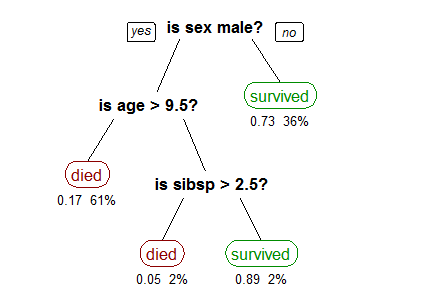

### Ventajas y desventajas
### Ventajas

1. Interpretabilidad: Fácil de entender y visualizar, permitiendo la interpretación de resultados.
2. Manejo de datos mixtos: Puede manejar datos categóricos y numéricos.
3. No requiere normalización de los datos.
### Desventajas
1. Sobreajuste: Puede ser propenso al sobreajuste.
2. Inestabilidad: Pequeñas variaciones en los datos pueden resultar en árboles diferentes, lo que los hace inestables.
3. Sensible a datos ruidosos.

In [28]:
data = pd.read_csv('../../data/raw/Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [29]:
categorical_columns = data.select_dtypes(include='object').columns
categorical_columns

Index(['Gender'], dtype='object')

In [30]:
import sklearn.preprocessing
import sklearn.compose



transformer = sklearn.compose.make_column_transformer(
    (sklearn.preprocessing.OneHotEncoder(), categorical_columns),
    remainder='passthrough'
)

In [31]:
encoded_df = (
    pd.DataFrame(
        transformer.fit_transform(data),
        columns = transformer.get_feature_names_out(),
        index=data.index
    )
    .rename(
        columns = lambda x: x.removeprefix('onehotencoder__')
    )
    .rename(
        columns = lambda x: x.removeprefix('remainder__')
    )
   
)
encoded_df

,Gender_Female,Gender_Male,User ID,Age,EstimatedSalary,Purchased
0,0.0,1.0,15624510.0,19.0,19000.0,0.0
1,0.0,1.0,15810944.0,35.0,20000.0,0.0
2,1.0,0.0,15668575.0,26.0,43000.0,0.0
3,1.0,0.0,15603246.0,27.0,57000.0,0.0
4,0.0,1.0,15804002.0,19.0,76000.0,0.0
...,...,...,...,...,...,...
395,1.0,0.0,15691863.0,46.0,41000.0,1.0
396,0.0,1.0,15706071.0,51.0,23000.0,1.0
397,1.0,0.0,15654296.0,50.0,20000.0,1.0
398,0.0,1.0,15755018.0,36.0,33000.0,0.0


In [32]:
X =encoded_df.iloc[:,[3,4]]

y = encoded_df.iloc[:,-1].values


In [33]:
from sklearn.model_selection import train_test_split


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [35]:
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [36]:
cls = DecisionTreeClassifier()
cls.fit(X_train, y_train)

DecisionTreeClassifier()

In [37]:
y_pred = cls.predict(X_test)

In [38]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[53  5]
 [ 3 19]]


In [39]:
from sklearn.metrics import precision_score, recall_score
print('Precision:',precision_score(y_test, y_pred))
print('Recall:',recall_score(y_test, y_pred))

Precision: 0.7916666666666666
Recall: 0.8636363636363636


In [40]:
from sklearn.metrics import f1_score
print('F1:',f1_score(y_test, y_pred))
     

F1: 0.8260869565217391


### Bosques aleatorios para clasificación
Un bosque aleatorio es un conjunto de árboles de decisión individuales entrenados en diferentes subconjuntos de datos y características. En el contexto de clasificación, cada árbol en el bosque realiza una predicción y la clase que recibe más votos se selecciona como la predicción final del bosque.

Los bosques aleatorios son útiles en situaciones donde:

* Se necesita alta precisión y generalización.
* conjuntos de datos complejos.
* Interpretación intermedia.

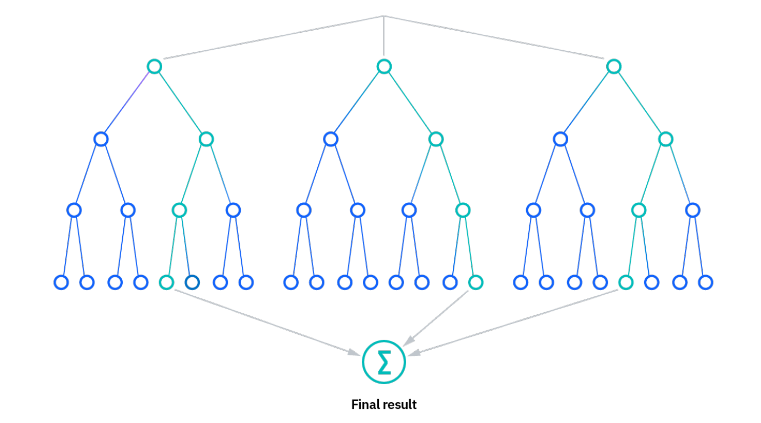

### Ventajas y desventajas
### Ventajas

1. Alta precisión
2. Robustez: Es robusto ante sobreajuste debido al muestro aleatorio y la combinación de múltiples árboles
3. Manejo de datos desbalanceados: Puede manejar problemas de clasificación desbalanceada de manera efectiva
### Desventajas

1. Menos interpretable que un solo árbol.
2. Menos eficiente en conjuntos de datos pequeños.
3. Tiempo de entrenamiento: Puede llevar más tiempo que el entrenamiento de un solo árbol, especialmente en conjuntos de datos grandes.

In [41]:
transformer = sklearn.compose.make_column_transformer(
    (sklearn.preprocessing.OneHotEncoder(), categorical_columns),
    remainder='passthrough'
)

In [42]:
encoded_df = (
    pd.DataFrame(
        transformer.fit_transform(data),
        columns = transformer.get_feature_names_out(),
        index=data.index
    )
    .rename(
        columns = lambda x: x.removeprefix('onehotencoder__')
    )
    .rename(
        columns = lambda x: x.removeprefix('remainder__')
    )
   
)
encoded_df

,Gender_Female,Gender_Male,User ID,Age,EstimatedSalary,Purchased
0,0.0,1.0,15624510.0,19.0,19000.0,0.0
1,0.0,1.0,15810944.0,35.0,20000.0,0.0
2,1.0,0.0,15668575.0,26.0,43000.0,0.0
3,1.0,0.0,15603246.0,27.0,57000.0,0.0
4,0.0,1.0,15804002.0,19.0,76000.0,0.0
...,...,...,...,...,...,...
395,1.0,0.0,15691863.0,46.0,41000.0,1.0
396,0.0,1.0,15706071.0,51.0,23000.0,1.0
397,1.0,0.0,15654296.0,50.0,20000.0,1.0
398,0.0,1.0,15755018.0,36.0,33000.0,0.0


In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [44]:
from sklearn.ensemble import RandomForestClassifier
cls = RandomForestClassifier(n_estimators=40) # 40 árboles
cls.fit(X_train, y_train)

y_pred = cls.predict(X_test)

In [45]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[64  4]
 [ 2 30]]


In [46]:
from sklearn.metrics import precision_score, recall_score
print('Precision:',precision_score(y_test, y_pred))
print('Recall:',recall_score(y_test, y_pred))


Precision: 0.8823529411764706
Recall: 0.9375


In [47]:
from sklearn.metrics import f1_score
print('F1:',f1_score(y_test, y_pred))

F1: 0.9090909090909091
